In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

## Generating random data samples

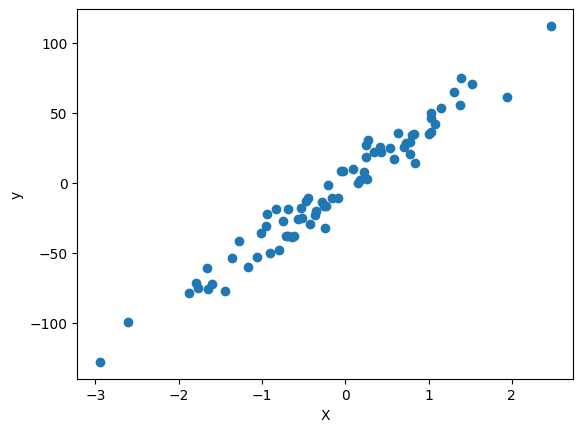

In [2]:
# Generate a dataset suitable for linear regression
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=10)
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
# Plot the data
plt.scatter(X_train, y_train)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

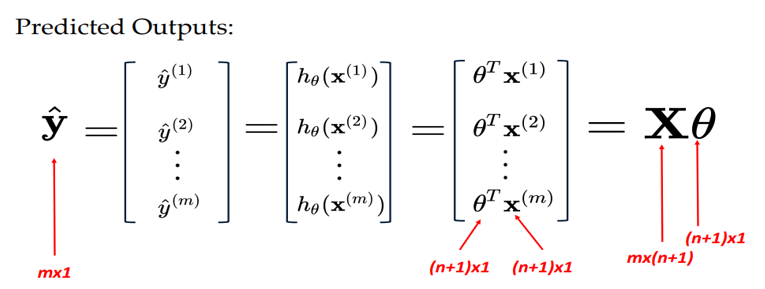

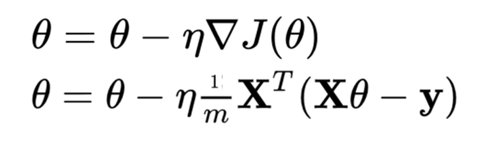

## Creating Linear regression Class

In [3]:
class LinearRegression():
    def __init__(self, lr= 0.001, n_iterations= 1000):
        self.lr = lr
        self.n_iterations = n_iterations
        self.weights = None
        #self.bias = None

    def fit(self, X, y):
        """
        X is the X_train
        y is the y_train
        """
        n_samples, n_features = X.shape
        X = np.c_[np.ones(n_samples), X]

        y = y.reshape(n_samples,-1)
        self.weights = np.zeros(((n_features + 1), 1))
        j = []

        for _ in range(self.n_iterations):
            y_pred = X.dot(self.weights)
            gradient = (1 /n_samples)* X.T.dot(X.dot(self.weights) - y)
            self.weights = self.weights - self.lr * gradient
            j.append(self._mse(y, y_pred))
        return j, self.weights

    def predict(self, X):
        """
        X is the X_test
        """
        n_samples, n_features = X.shape
        X = np.c_[np.ones(n_samples), X]
        y_pred = X.dot(self.weights)
        return y_pred

    def _mse(self, y, y_pre):
        return np.mean((y-y_pre)**2)

## Creating Linear regresseor object

In [4]:
reg = LinearRegression(lr=0.1, n_iterations=100)
j, weights = reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

In [5]:
reg2 = LinearRegression(lr=0.1, n_iterations=50000)
j, weights = reg2.fit(X_train,y_train)
predictions = reg2.predict(X_test)

In [6]:
weights

array([[-0.21964423],
       [42.24076763]])

## Plotting the cost function Vs. n_iterations

Text(0, 0.5, 'Cost functions')

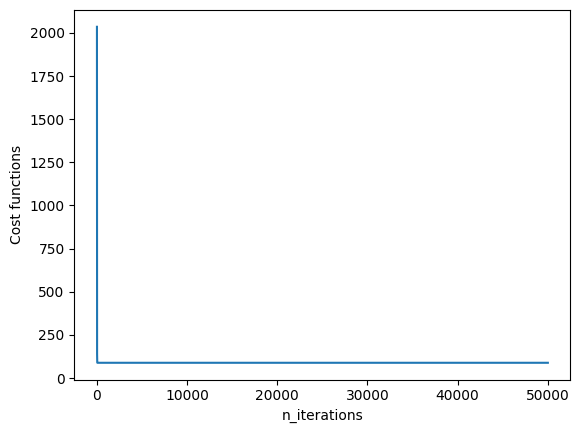

In [7]:
plt.plot(np.array(j))
plt.xlabel("n_iterations")
plt.ylabel("Cost functions")

## Calculte the cost dunction for testing data-set

In [8]:
def mse(y_test, predictions):
    y_test = y_test.reshape(y_test.shape[0], -1)
    return np.mean((y_test-predictions)**2)

In [9]:
mse = mse(y_test, predictions)
print(mse)

85.49104059128327


## Plotting the predicted line

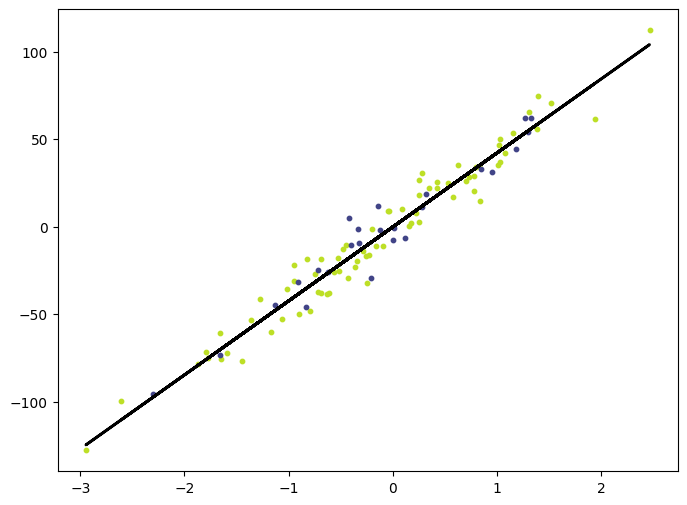

In [10]:
y_pred_line = reg.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.2), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()